In [1]:
%matplotlib inline

In [72]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedKFold

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

In [3]:
read_json = lambda x : pd.read_json(x, lines = True)

In [4]:
train_X = read_json("train_X_languages_homework.json.txt")
train_y = read_json("train_y_languages_homework.json.txt")
test_X = read_json("test_X_languages_homework.json.txt")

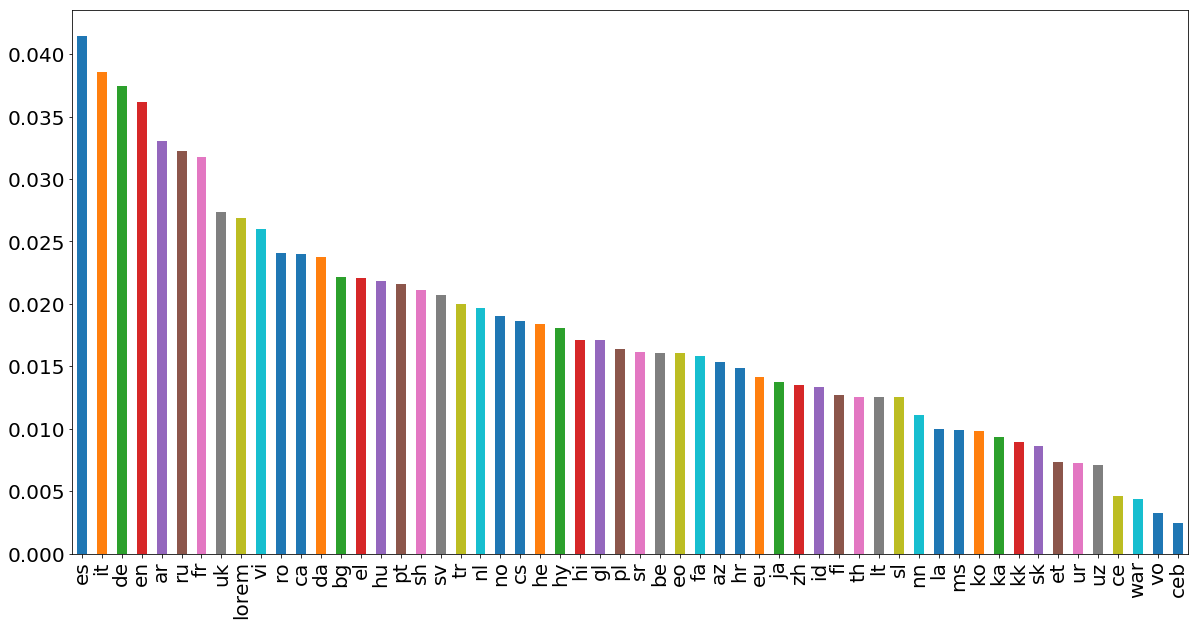

In [5]:
train_y.classification.value_counts(normalize = True).plot.bar(figsize = (20, 10), fontsize = 20)

In [66]:
class TextTokenizer(BaseEstimator, TransformerMixin):
    def fit(self, x, y = None):
        return self
    
    def transform(self, sentences):
        tokenizer = RegexpTokenizer(r'\w+')
        features = []
        for sentence in sentences:
            features.append(" ".join(tokenizer.tokenize(sentence)))
        return features

In [67]:
detection_pipeline = Pipeline([
    ('tokenizer', TextTokenizer()),
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

In [68]:
sentences = train_X.text.tolist()
labels = train_y.classification.tolist()

In [69]:
kf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)

In [73]:
accuracy = []
for train_idx, test_idx in kf.split(sentences, labels):
    train, test = [sentences[i]
                       for i in train_idx], [sentences[i] for i in test_idx]
    y_train, y_test = [labels[i]
                       for i in train_idx], [labels[i] for i in test_idx]
    detection_pipeline.fit(train, y_train)
    prediction = detection_pipeline.predict(test)
    temp = np.sum(y_test == prediction) * 1.0 / len(y_test)
    accuracy.append(temp)
    print temp
print np.mean(accuracy)

[0.73301725168333398]
[0.73301725168333398, 0.72981267437225983]
[0.73301725168333398, 0.72981267437225983, 0.73152837034969498]
[0.73301725168333398, 0.72981267437225983, 0.73152837034969498, 0.73084134519487776]
[0.73301725168333398, 0.72981267437225983, 0.73152837034969498, 0.73084134519487776, 0.72637292464878667]
0.73031451325
